# Lab session 2: Fast Wavelet Transform, image compression and denoising

Name(s): David Elliott Perryman

## Prerequisite

### Install Anaconda and PyWavelet

* The simplest is to download the Anaconda distribution (including PyWavelet) : https://www.anaconda.com/ 
* Or follows these instructions: https://pywavelets.readthedocs.io/en/latest/install.html
* Read the documentation on Pywavelet: https://pywavelets.readthedocs.io/_/downloads/en/v0.5.1/pdf/
* Code available on Github (to know how it is implemented): https://github.com/PyWavelets/pywt/tree/580d79d9440ec0f4f936892e39c79ad13a8fd33b 

### Instructions

* Fill empty codes and answer the questions in the notebook
* Upload on TEIDE an archive (with your NAME in capital letters, separated by an underscore for teams NAME1_NAME2) containing:
    * your completed notebook (the python code .ipynb)
    * the corresponding exported PDF
* **Deadline: December 16 (23h59)**. 

### Mark scheme

* This practical work is graded out of 20 points (but at the end the two lab sessions will represent a quarter of the final mark, i.e each accounting for 2,5 points)
* Hand in overdue: -10% per day
* Plagiarism (e.g copy/paste codes of others students): mark divided by 2

### Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
from numpy import random

## The 1-D Discrete Wavelet Transform

### Play with the DWT of simple 1-D signals

Let's start with the toy example used in the course (*slides 180-182*):

In [2]:
vals = [2, 4, 8, 12, 14, 0, 2, 1]

**Question 1** *(1 point)*. Plot the corresponding piecewise constant function on a uniform grid on $[0,1]$ as in the course (pay attention to the interval limits). 

*Hint: you can use the command* `plt.step`

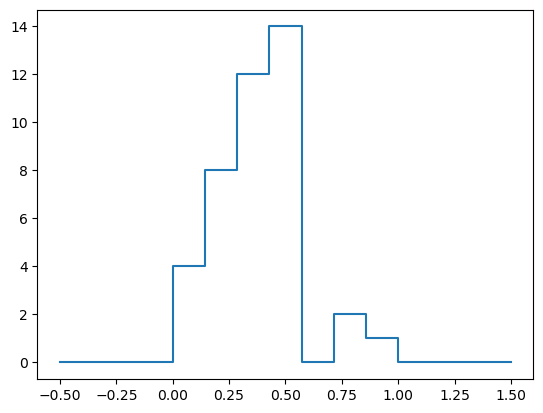

In [3]:
plt.step([-0.5,0]+list(np.linspace(0,1,len(vals)))+[1,1.5], [0,0]+vals+[0,0])

**Question 2** *(1 point)*. Compute the 1-D discrete wavelet transform with `pywt.dwt` and the Haar wavelet (see documentation: https://pywavelets.readthedocs.io/en/latest/regression/dwt-idwt.html). Show that to a factor we retrieve the approximation and details coefficients found in the course.

In [4]:
cA, cD = pywt.dwt(vals, 'haar')

In [5]:
cA, cD

(array([ 4.24264069, 14.14213562,  9.89949494,  2.12132034]),
 array([-1.41421356, -2.82842712,  9.89949494,  0.70710678]))

In [6]:
cA*np.sqrt(2)/2, cD*np.sqrt(2)/2

(array([ 3. , 10. ,  7. ,  1.5]), array([-1. , -2. ,  7. ,  0.5]))

**Answer 2** *(1 point)*. In the course notes, on page 180, the coefficients are the same as cA and cD up to a factor of $\sqrt{2}$ over 2

**Question 3** *(2 points)*. Show numerically that it is equivalent to perform a convolution with filters $h=[1,1]/\sqrt{2}$ and $g=[-1,1]/\sqrt{2}$ respectively followed by a decimation. Write the complete decomposition by iterating the procedure on the approximation coefficients (by applying the convolutions or directly `pywt.dwt`).

In [7]:
h = np.array([ 1.,1])/np.sqrt(2)
g = np.array([-1.,1])/np.sqrt(2)

In [8]:
def dec(X):
    return np.convolve(X, h,'valid')[::2]*np.sqrt(2)/2, np.convolve(X,g,'valid')[::2]*np.sqrt(2)/2
def rec(_h, _g):
    r1 = np.array([_h[i//2] for i in range(len(_h)*2)])
    r2 = np.array([_g[i//2]*g[::-1][i%2] for i in range(len(_h)*2)])
    return r1+r2*np.sqrt(2)

In [9]:
mean, detail = dec(vals)
mean, detail

(array([ 3. , 10. ,  7. ,  1.5]), array([-1. , -2. ,  7. ,  0.5]))

In [10]:
mean2, detail2 = dec(mean)
mean2, detail2

(array([6.5 , 4.25]), array([-3.5 ,  2.75]))

In [11]:
mean3, detail3 = dec(mean2)
mean3, detail3

(array([5.375]), array([1.125]))

In [12]:
rec(rec(rec(mean3, detail3), detail2), detail)

array([ 2.,  4.,  8., 12., 14.,  0.,  2.,  1.])

Above, I replicate the output of pywt.dwt and page 180 of the notes along with showing the reconstruction

### 1-D Multi-resolution analysis with the Haar wavelet

**Question 4** *(2 points)*. Obtain the same results by computing the multi-resolution analysis of `vals` with `pywt.wavedec`, the Haar wavelet and the option `mode='zero'` (see documentation: https://pywavelets.readthedocs.io/en/latest/regression/multilevel.html and https://pywavelets.readthedocs.io/en/latest/ref/signal-extension-modes.html#modes)  

In [13]:
pywt.wavedec(vals, 'haar', mode='zero')

[array([15.2027958]),
 array([3.18198052]),
 array([-7. ,  5.5]),
 array([-1.41421356, -2.82842712,  9.89949494,  0.70710678])]

pywt.wavedec gives the same results but differs by a multiplicative factor

**Question 5** *(2 points)*. Apply the same decomposition to the `Piece-Regular` signal `f`. Plot the projections of `f` on different approximation and detail spaces as illustrated in the course (*slide 184*).

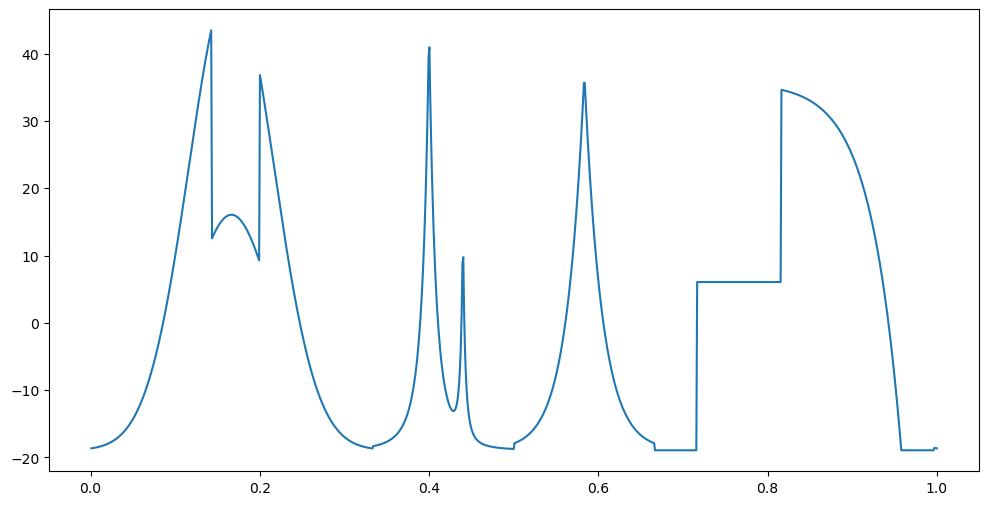

In [14]:
n = 1024
f = pywt.data.demo_signal('Piece-Regular', n)
t = np.arange(1, n + 1)/n
plt.figure(figsize=(12, 6))
plt.plot(t, f)
plt.show()

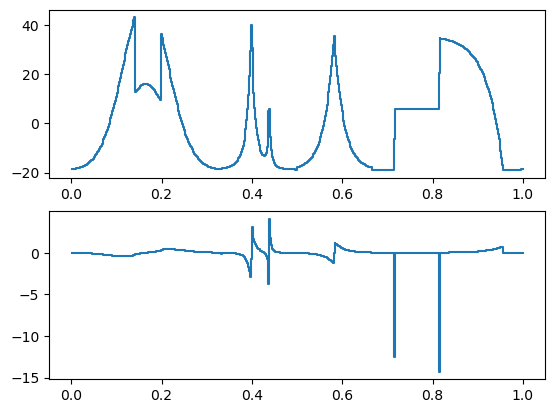

In [15]:
m,d = dec(f)
t = t[::2]
plt.subplots(2,1)
plt.subplot(211)
plt.step(t,m)
plt.subplot(212)
plt.step(t,d)

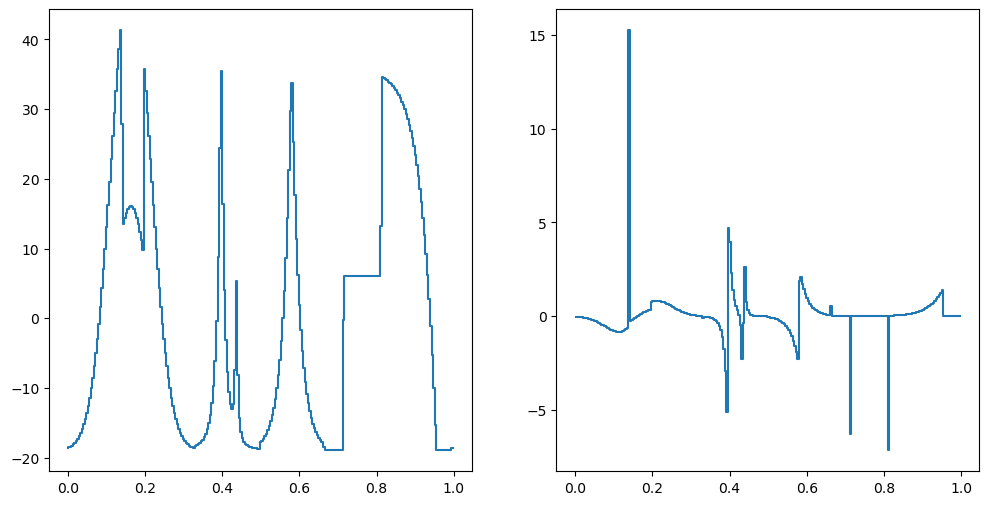

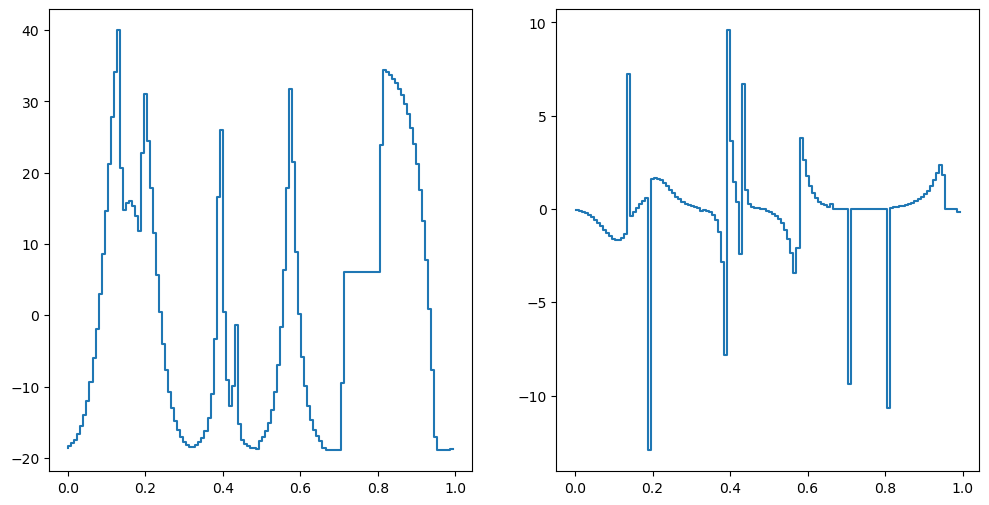

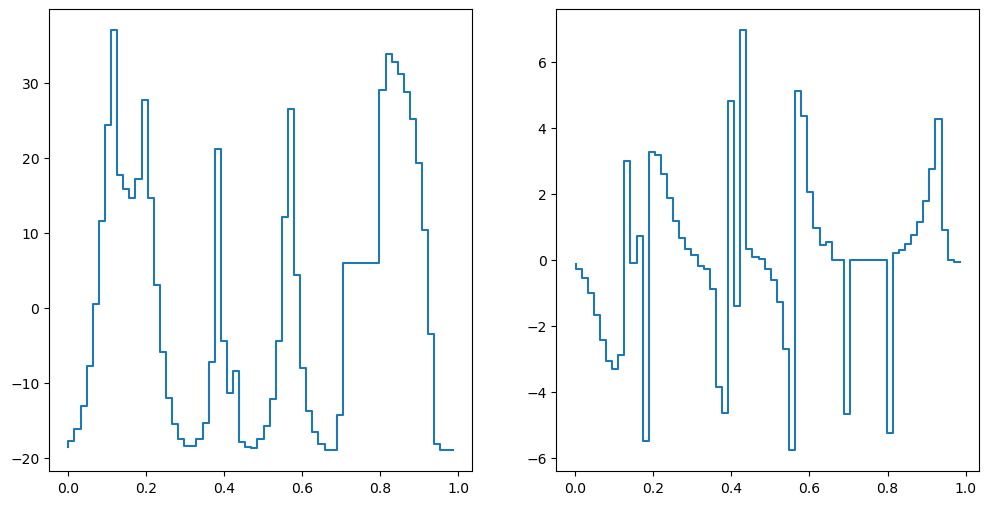

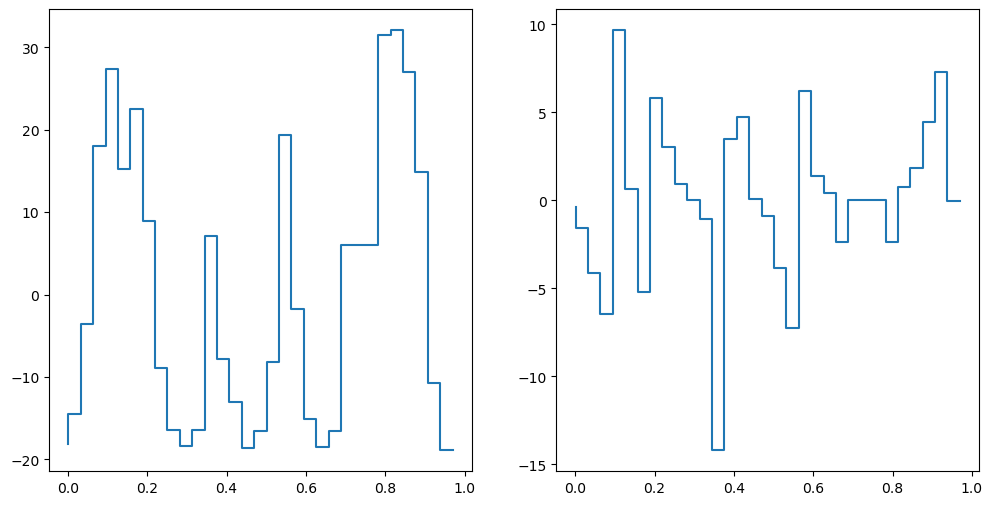

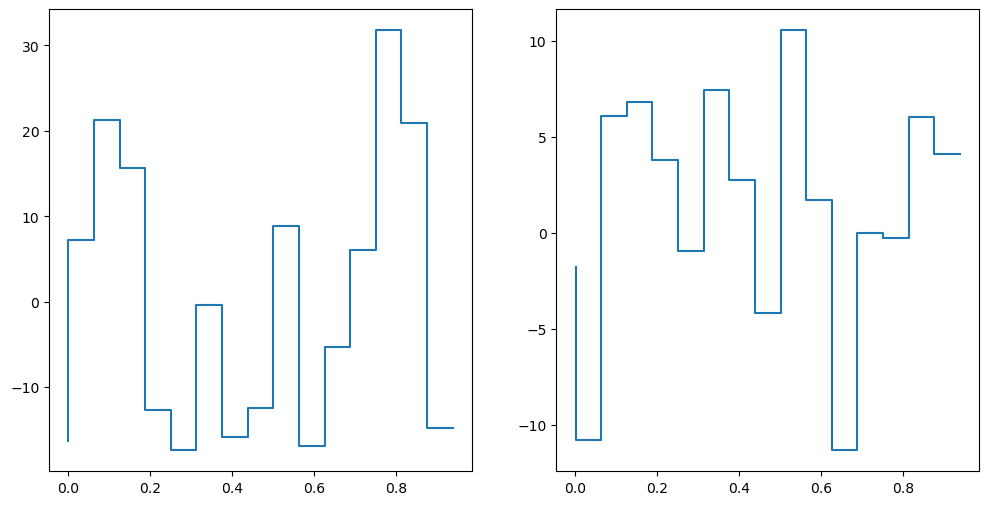

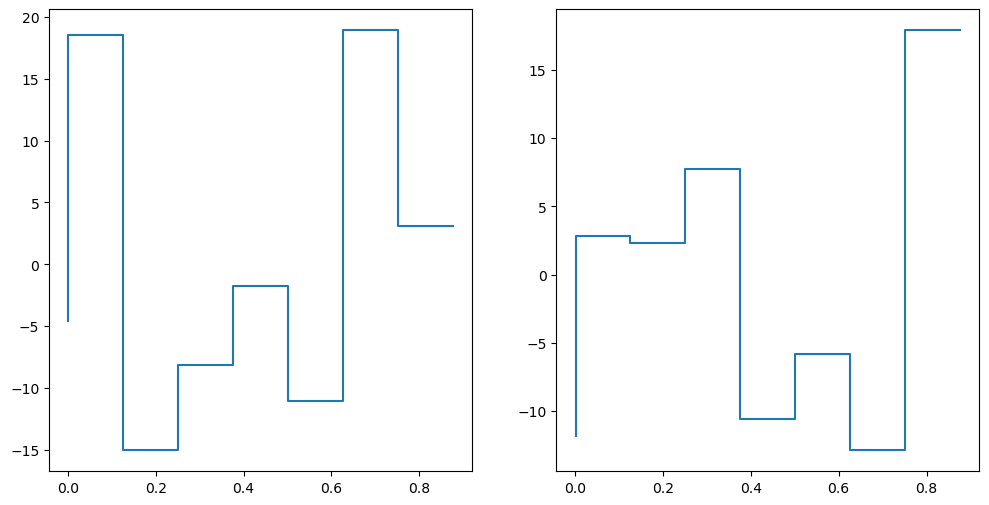

In [16]:
for i in range(6):
    m,d = dec(m)
    t = t[::2]
    plt.subplots(1,2,figsize=(12,6))
    plt.subplot(121)
    plt.step(t,m)
    plt.subplot(122)
    plt.step(t,d)
    plt.show()

**Answer 5** *(2 points)*. As on page 184, I repeatedly apply the decomposition.

### 1-D Multi-resolution analysis with the Debauchies wavelets

In [17]:
w = pywt.Wavelet('db2')
print(w)

Wavelet db2
  Family name:    Daubechies
  Short name:     db
  Filters length: 4
  Orthogonal:     True
  Biorthogonal:   True
  Symmetry:       asymmetric
  DWT:            True
  CWT:            False


The filters used to construct the corresponding scaling and wavelet functions are given by:

In [18]:
fb = w.filter_bank
print(fb)

([-0.12940952255126037, 0.2241438680420134, 0.8365163037378079, 0.48296291314453416], [-0.48296291314453416, 0.8365163037378079, -0.2241438680420134, -0.12940952255126037], [0.48296291314453416, 0.8365163037378079, 0.2241438680420134, -0.12940952255126037], [-0.12940952255126037, -0.2241438680420134, 0.8365163037378079, -0.48296291314453416])


*Remark*. The low-pass and high-pass filters of the decomposition are respectively denoted by `dec_lo` and `dec_hi`, as well for the reconstruction filter `rec_lo` and `rec_hi`, hence `filter_bank = (dec_lo, dec_hi, rec_lo, rec_li)`. Since this wavelet is of type orthogonal, then the reconstruction filters $h$ (low-pass) and $g$ (high-pass) are the flipped version of the decomposition filters $\check g$ and $\check h$:

In [19]:
(w.dec_lo == w.rec_lo[::-1]) & (w.dec_hi == w.rec_hi[::-1])

True

One can plot these filters:

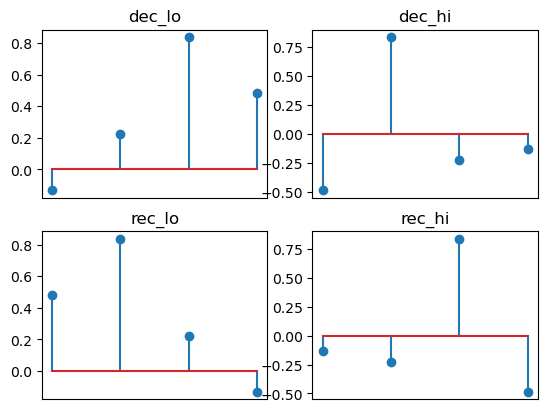

In [20]:
filt_type = ["dec_lo", "dec_hi", "rec_lo", "rec_hi"]
for index in range(4):
    ax = plt.subplot(2, 2, index + 1)
    plt.stem(range(4), fb[index], use_line_collection = True)
    plt.title(filt_type[index])
    ax.axes.get_xaxis().set_visible(False)
plt.show()

As well for the corresponding scaling and wavelet functions:

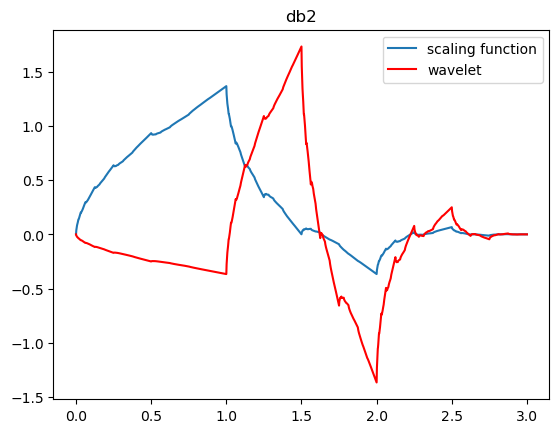

In [21]:
(phi, psi, x) = w.wavefun(level=10)
plt.plot(x, phi, label = "scaling function")
plt.plot(x, psi, 'r', label = "wavelet")
plt.legend()
plt.title(w.name)
plt.show()

Please visit: http://wavelets.pybytes.com/wavelet/db2/ for a more complete overview. 

**Question 6** *(2 points)*. Visualize the results obtained by replacing in Question 5 `'Haar'` by `'db2'`. *(This reproduces the figures in the course at slides 209-210)*

**Answer 6** *(2 points)*. Both Haar and db2 decompositions are shown. As expected, the transform produces a sparse representation

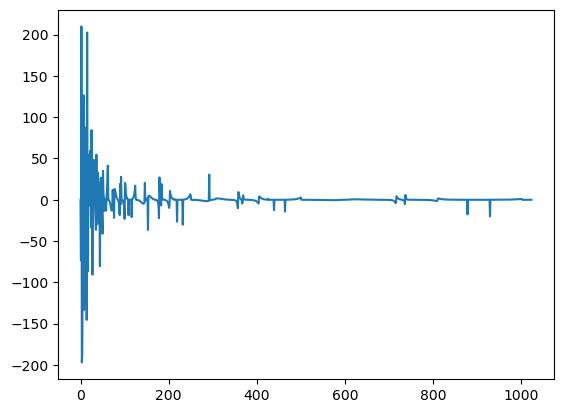

In [22]:
plt.plot(np.concatenate(tuple(pywt.wavedec(f,'Haar',mode='zero'))))

<StemContainer object of 3 artists>

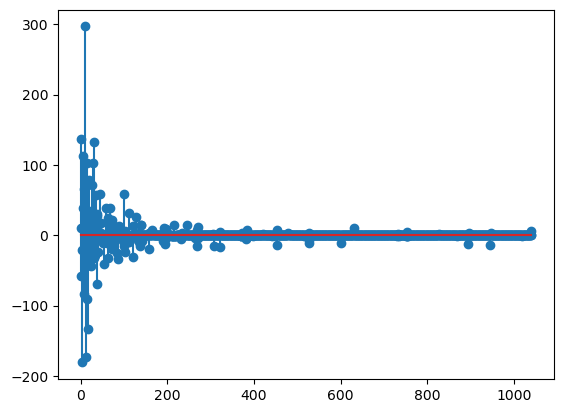

In [23]:
plt.stem(np.concatenate(tuple(pywt.wavedec(f,'db2',mode='zero'))))

### Signal compression and reconstruction

**Question 7** *(3 points)*. Write two functions:
* `compression` which keeps the $M$ largest coefficients of a wavelet decomposition and put the others to zero.
* `reconstruction` which reconstruct the signal $\tilde f_M$ from the $M$ largest coefficients with `pywt.waverec` and compute the $L_2$ relative error with the original signal $f$, that is $\epsilon(M)=\frac{\|f-\tilde f_M\|_2}{\|f\|_2}$

*Hint:* You might need the following commands: 
* `np.ravel` (see doc: https://numpy.org/doc/stable/reference/generated/numpy.ravel.html)
* `pywt.coeffs_to_array` and `pywt.array_to_coeffs` (see doc: https://pywavelets.readthedocs.io/en/latest/ref/dwt-coefficient-handling.html)

Then apply `compression` and `reconstruction` to the `Piece-regular` function with the Daubechies wavelet `db2` and the following parameters:

**Answer 7** *(3 points)*. I assume that we should only zero out the coefficients, not necessarily write a sparse storage format. This is done below

In [24]:
n = 1024
f = pywt.data.demo_signal('Piece-Regular', n)
t = np.arange(1, n + 1)/n
ratio = 7.5/100
M = int(ratio * n)
compressFactor = 1 - ratio

In [25]:
def compression(f, M):
    coeff_arr, coeff_slices = pywt.coeffs_to_array(pywt.wavedecn(f, 'db2', mode='zero'))
    x = np.abs(coeff_arr).flatten()
    T = x[np.argsort(x)[-M]]
    coeff_arr[np.abs(coeff_arr)<T] = 0
    return pywt.array_to_coeffs(coeff_arr, coeff_slices)

In [26]:
def reconstruction(coeffs, f, plot=False):
    f_rec = pywt.waverecn(coeffs, 'db2', mode='zero')
    if plot:
        plt.plot(f_rec)
        plt.title('M: '+str(M))
        plt.show()
    return np.linalg.norm(f_rec-f)/np.linalg.norm(f)

In [27]:
coeffs = compression(f, M)
err = reconstruction(coeffs, f)
err

0.0821070606139063

In [28]:
E = []
M_range = np.logspace(1,3,10).astype(int)
for M in M_range:
    coeffs = compression(f, M)
    err = reconstruction(coeffs, f)
    E.append(err)

[]

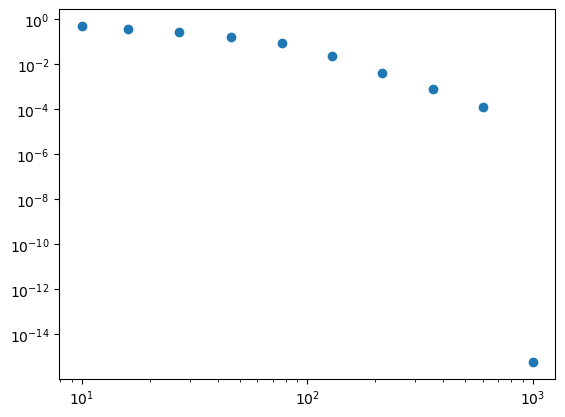

In [29]:
plt.scatter(M_range, E)
plt.loglog()

**(Bonus)** *(1 point)* Same question with the function $x\mapsto \sqrt{|\cos(2\pi x)|}$ *(slide 212)* but now for different compression factors: plot the curve of the error $M\mapsto\epsilon(M)$ in the log-log scale using `plt.loglog`. What do you observe? Conclude.

In [30]:
f = np.sqrt(np.abs(np.cos(2*np.pi*t)))

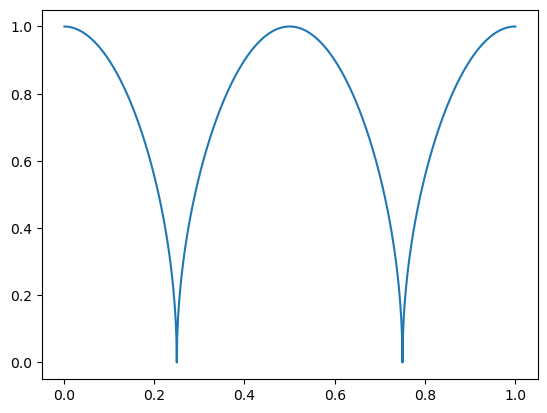

In [31]:
plt.plot(t,f)

In [32]:
E = []
M_range = np.logspace(1,3,100).astype(int)
for M in M_range:
    coeffs = compression(f, M)
    err = reconstruction(coeffs, f)
    E.append(err)

[]

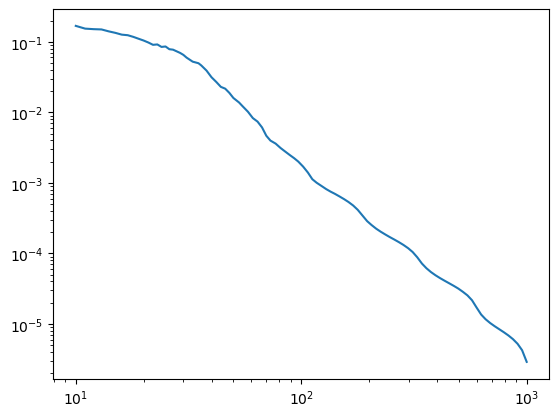

In [33]:
plt.plot(M_range, E)
plt.loglog()

**(Bonus)** *(1 point)* The error seems to be piecewise linear, with some slow decrease in a region where every coefficient gives essential detail, then fast decrease as the bulk of coefficients only contribute a small amount.

## 2-D Discrete Wavelet Transform

### 2-D Multi-resolution analysis

Now we will perform a 2-D MRA onto images and use their decomposition to compress and denoise them.

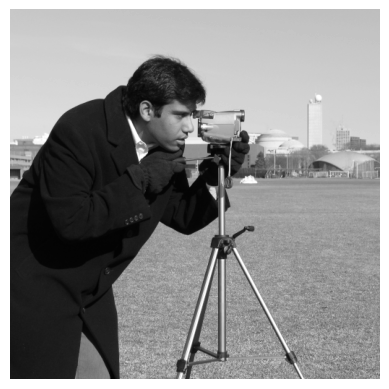

In [34]:
f = pywt.data.camera()
n = f.shape[0] # size of the image
plt.imshow(f, cmap='gray')
plt.axis('off');

The documentation of PyWavelet clearly explains below how to compute the 2-D multi-scale analysis (source: https://pywavelets.readthedocs.io/en/latest/ref/2d-decompositions-overview.html):

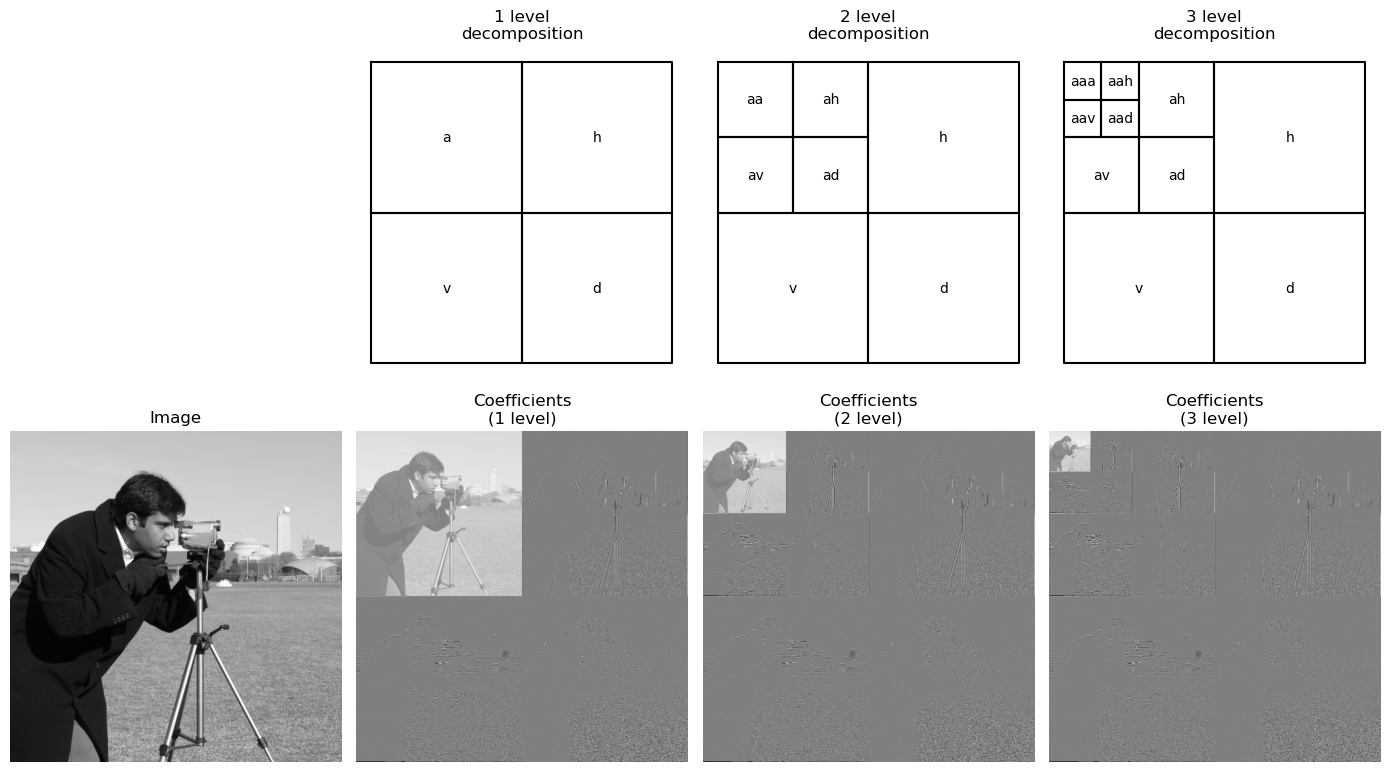

In [35]:
from pywt._doc_utils import wavedec2_keys, draw_2d_wp_basis

x = pywt.data.camera().astype(np.float32)
shape = x.shape

max_lev = 3       # how many levels of decomposition to draw
label_levels = 3  # how many levels to explicitly label on the plots

fig, axes = plt.subplots(2, 4, figsize=[14, 8])
for level in range(0, max_lev + 1):
    if level == 0:
        # show the original image before decomposition
        axes[0, 0].set_axis_off()
        axes[1, 0].imshow(x, cmap=plt.cm.gray)
        axes[1, 0].set_title('Image')
        axes[1, 0].set_axis_off()
        continue

    # plot subband boundaries of a standard DWT basis
    draw_2d_wp_basis(shape, wavedec2_keys(level), ax=axes[0, level],
                     label_levels=label_levels)
    axes[0, level].set_title('{} level\ndecomposition'.format(level))

    # compute the 2D DWT
    c = pywt.wavedec2(x, 'db2', mode='periodization', level=level)
    # normalize each coefficient array independently for better visibility
    c[0] /= np.abs(c[0]).max()
    for detail_level in range(level):
        c[detail_level + 1] = [d/np.abs(d).max() for d in c[detail_level + 1]]
    # show the normalized coefficients
    arr, slices = pywt.coeffs_to_array(c)
    axes[1, level].imshow(arr, cmap=plt.cm.gray)
    axes[1, level].set_title('Coefficients\n({} level)'.format(level))
    axes[1, level].set_axis_off()

plt.tight_layout()
plt.show()

*Remark*. The notation is quite different from that of the course, in which the initial image is denoted by $C_9$ (since the size is $n=2^9=512$) and the indices of the coarser spaces decrease as follows *(notation `Dj_i` corresponds to $D_j^i$ in slide 215)*:

In [36]:
C6, (D6_2, D6_1, D6_3), (D7_2, D7_1, D7_3), (D8_2, D8_1, D8_3) = c

For example, the finest horizontal details (on the bottom left in the aboved last image) correspond to coefficients $D_8^1$:

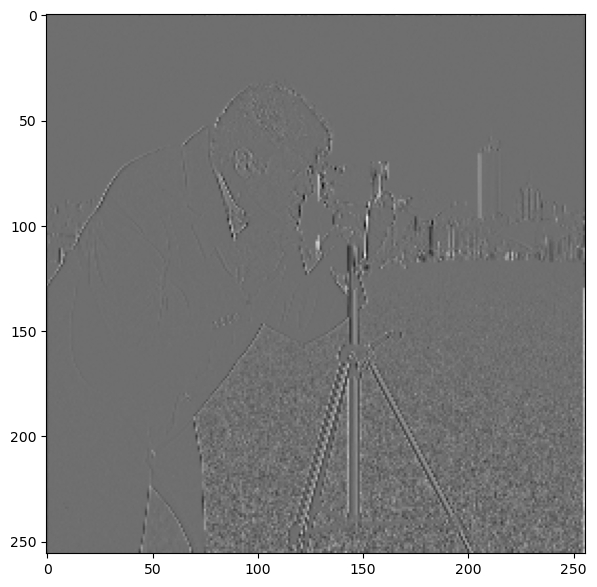

In [37]:
plt.figure(figsize=(7,7))
plt.imshow(D8_1, cmap=plt.cm.gray)
plt.show()

From these coefficients we are able to reconstruct the original image by `pywt.waverec2` (see documentation: https://pywavelets.readthedocs.io/en/latest/ref/nd-dwt-and-idwt.html#multilevel-reconstruction-waverecn)

### Image compression

**Question 8** *(2 points)*. Use the `compression` function which keeps the $M$ largest coefficients and reconstruct the compressed image with `pywt.waverec2`. Compute the PSNR with the original image and highlight the non-zeros coefficients in the multi-level decomposition plot.

**Answer 8** *(2 points)*. I compress the signal, compute the PSNR, show the reconstruction, find the percentage of zeros at each level, and plot the multilevel image.

In [38]:
def psnr(img1, img2):
    mse = np.mean( (img1 - img2) ** 2 )
    PIXEL_MAX = 255.0
    return 20 * np.log10(PIXEL_MAX / np.sqrt(mse))

You will use these parameters:

In [39]:
ratio = 1.5/100
M = int(ratio * n**2)
compressFactor = 1 - ratio

In [40]:
coeffs = compression(f, M)

In [41]:
f_rec = pywt.waverecn(coeffs, 'db2', mode='zero')

In [42]:
psnr(f, f_rec)

26.230410310058282

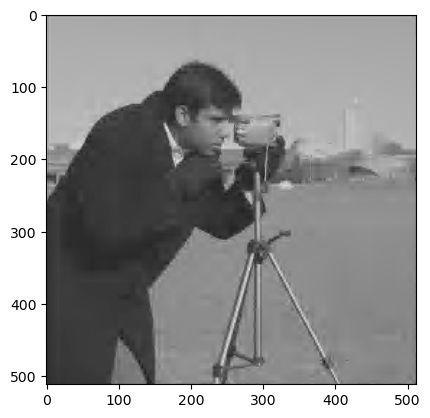

In [43]:
plt.imshow(f_rec, cmap='gray')

In [44]:
coeff_arr, coeff_slices = pywt.coeffs_to_array(pywt.wavedec2(f_rec, 'db2', mode='zero'))

In [45]:
coeff_arr[coeff_slices[1]['ad'][0], coeff_slices[1]['ad'][1]].shape

(6, 6)

In [46]:
for i, lvl in enumerate(coeff_slices[1:]):
    for key in lvl:
        subimg = coeff_arr[lvl[key][0],lvl[key][1]]
        print(i, key, subimg.shape, 100*np.sum(np.isclose(subimg,0))/np.prod(subimg.shape))

0 ad (6, 6) 0.0
0 da (6, 6) 0.0
0 dd (6, 6) 0.0
1 ad (10, 10) 8.0
1 da (10, 10) 7.0
1 dd (10, 10) 12.0
2 ad (18, 18) 35.80246913580247
2 da (18, 18) 39.19753086419753
2 dd (18, 18) 42.901234567901234
3 ad (34, 34) 62.28373702422145
3 da (34, 34) 64.27335640138408
3 dd (34, 34) 70.41522491349481
4 ad (66, 66) 80.96877869605143
4 da (66, 66) 84.2516069788797
4 dd (66, 66) 87.60330578512396
5 ad (130, 130) 93.53846153846153
5 da (130, 130) 95.10059171597634
5 dd (130, 130) 97.76923076923077
6 ad (257, 257) 99.15063059243894
6 da (257, 257) 99.21876182833957
6 dd (257, 257) 99.99394389014216


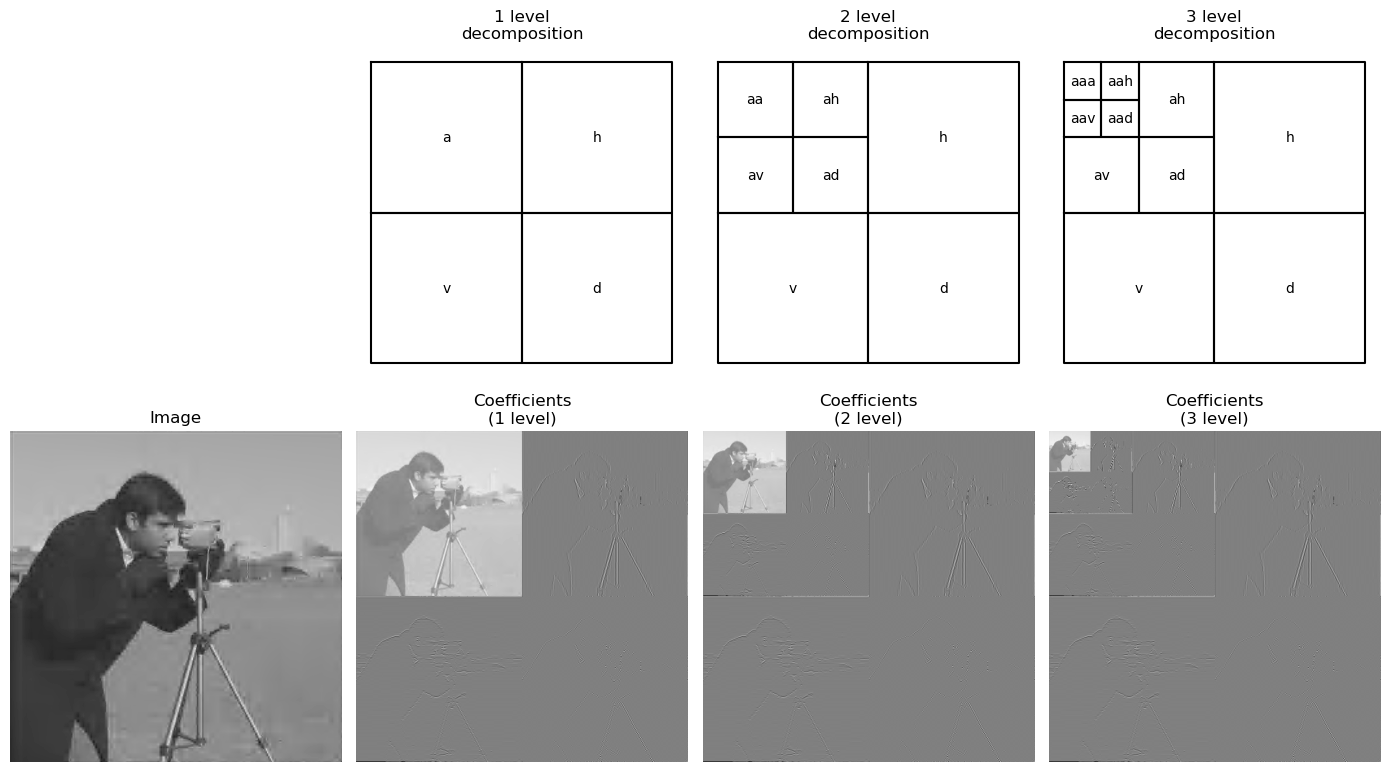

In [47]:
x = f_rec.astype(np.float32)
shape = x.shape

max_lev = 3       # how many levels of decomposition to draw
label_levels = 3  # how many levels to explicitly label on the plots

fig, axes = plt.subplots(2, 4, figsize=[14, 8])
for level in range(0, max_lev + 1):
    if level == 0:
        # show the original image before decomposition
        axes[0, 0].set_axis_off()
        axes[1, 0].imshow(x, cmap=plt.cm.gray)
        axes[1, 0].set_title('Image')
        axes[1, 0].set_axis_off()
        continue

    # plot subband boundaries of a standard DWT basis
    draw_2d_wp_basis(shape, wavedec2_keys(level), ax=axes[0, level],
                     label_levels=label_levels)
    axes[0, level].set_title('{} level\ndecomposition'.format(level))

    # compute the 2D DWT
    c = pywt.wavedec2(x, 'db2', mode='periodization', level=level)
    # normalize each coefficient array independently for better visibility
    c[0] /= np.abs(c[0]).max()
    for detail_level in range(level):
        c[detail_level + 1] = [d/np.abs(d).max() for d in c[detail_level + 1]]
    # show the normalized coefficients
    arr, slices = pywt.coeffs_to_array(c)
    axes[1, level].imshow(arr, cmap=plt.cm.gray)
    axes[1, level].set_title('Coefficients\n({} level)'.format(level))
    axes[1, level].set_axis_off()

plt.tight_layout()
plt.show()

### Image Denoising

**Question 9** *(2 points)*. Plot with `plt.semilogy` the decrease of the wavelet coefficients (sorted in absolute values) for the following image and its noisy version. (*hint: use the command `pywt.ravel_coeffs` see documentation https://pywavelets.readthedocs.io/en/latest/ref/dwt-coefficient-handling.html#raveling-and-unraveling-coefficients-to-from-a-1d-array*)

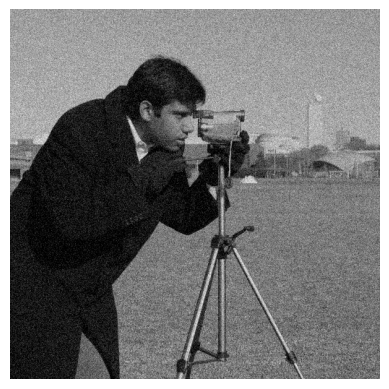

In [48]:
image = pywt.data.camera().astype(np.float32)
image = image / np.linalg.norm(image, 'fro') # normalization
wavelet = pywt.Wavelet('db4')
levels  = int(np.floor(np.log2(image.shape[0])))
sigma = 0.0003 # noise variance
imageNoisy = image + random.normal(0, sigma, size=image.shape)
plt.imshow(np.clip(imageNoisy,0,255), cmap='gray'); plt.axis('off');

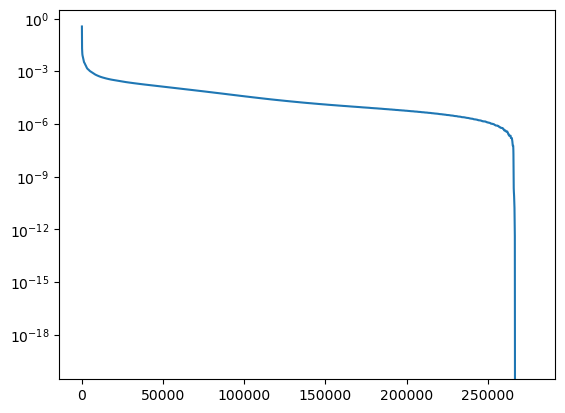

In [49]:
img = image
coef_arr, coef_slices = pywt.coeffs_to_array(pywt.wavedec2(img, 'db2', mode='zero'))
ind = np.argsort(np.abs(coef_arr.flatten()))[::-1]
plt.plot(np.abs(coef_arr.flatten()[ind]))
plt.semilogy();

Now we will apply a threshold to these coefficients in order to reduce the amount of noise. Two types of thresholding will be investigated:
* Hard thresholding
* Soft thresholding

It requires the use of the `pywt.threshold` command (see documentation: https://pywavelets.readthedocs.io/en/latest/ref/thresholding-functions.html)

Text(0, 0.5, 'thresholded value')

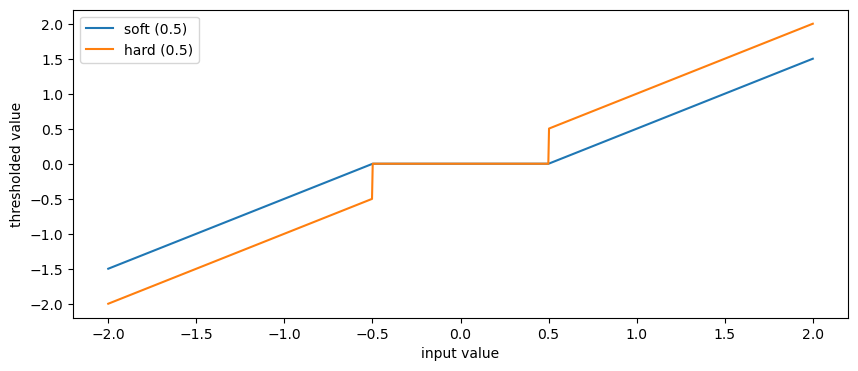

In [50]:
s = np.linspace(-2, 2, 1000)
s_soft = pywt.threshold(s, value = 0.5, mode = 'soft')
s_hard = pywt.threshold(s, value = 0.5, mode = 'hard')
plt.figure(figsize = (10, 4))
plt.plot(s, s_soft)
plt.plot(s, s_hard)
plt.legend(['soft (0.5)', 'hard (0.5)'])
plt.xlabel('input value')
plt.ylabel('thresholded value')

**Question 10** *(3 points)*. Write two functions which respectively denoise a 1-D signal and a 2-D image by applying a soft threshold $T$ on the wavelet coefficients, whose value is fixed to $T=\widehat \sigma \sqrt{2\log n}$. An estimator $\widehat \sigma$ of the true noise variance $\sigma$ (see variable `sigma`) is given by the median of the wavelet coefficients at the finest scale. Then, reconstruct the signal/image and plot the noisy et denoised version (on the same plot for signals and side-by-side for images). Experiment with `imageNoisy` (above) and `signalNoisy` (below) and try different wavelets (e.g `db4`).

In [51]:
def denoise(f, thresh='hard', wave='db2'):
    D = f.ndim
    if D==1:
        coeffs = pywt.wavedec(f,wave,mode='zero')
        sigma = np.median(np.abs(coeffs[-1]))
        T = sigma * np.sqrt(2*np.log(len(f)))
        coeff_arr, coeff_slices = pywt.coeffs_to_array(coeffs)
        if thresh=='hard':
            coeff_arr[np.abs(coeff_arr)<T] = 0
        elif thresh=='soft':
            mask = np.abs(coeff_arr)<T
            coeff_arr[mask] = 0
            coeff_arr[~mask] -= T
        else:
            raise NotImplementedError('threshold method unknown')
        coeffs = pywt.array_to_coeffs(coeff_arr, coeff_slices, output_format='wavedec')
        f_rec = pywt.waverec(coeffs, wave, mode='zero')
        plt.subplots(2,1,figsize=(12,6))
        plt.subplot(211)
        plt.plot(f)
        plt.title('original signal')
        plt.subplot(212)
        plt.plot(f_rec)
        plt.title('reconstructed signal')
    elif D==2:
        coeffs = pywt.wavedec2(f,wave,mode='zero')
        sigma = np.median(np.abs(coeffs[-1]).flatten())
        T = sigma * np.sqrt(2*np.log(np.prod(f.shape)))
        coeff_arr, coeff_slices = pywt.coeffs_to_array(coeffs)
        if thresh=='hard':
            coeff_arr[np.abs(coeff_arr)<T] = 0
        elif thresh=='soft':
            mask = np.abs(coeff_arr)<T
            coeff_arr[mask] = 0
            coeff_arr[~mask] -= T
        else:
            raise NotImplementedError('threshold method unknown')
        coeffs = pywt.array_to_coeffs(coeff_arr, coeff_slices, output_format='wavedec2')
        f_rec = pywt.waverec2(coeffs, wave, mode='zero')
        plt.subplots(2,1,figsize=(12,6))
        plt.subplot(211)
        plt.imshow(f, cmap='gray')
        plt.title('original signal')
        plt.subplot(212)
        plt.imshow(f_rec, cmap='gray')
        plt.title('reconstructed signal')
    else:
        raise NotImplementedError('dimension not 1 or 2')

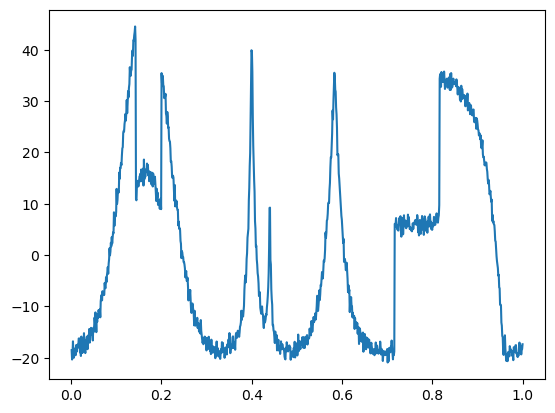

In [52]:
n = 1024
t = np.arange(1, n + 1)/n
signal = pywt.data.demo_signal('Piece-Regular', n)        # try also with 'Doppler'
sigma = 1                                                 # sigma = 0.03 for 'Doppler'            
signalNoisy = signal + sigma * random.standard_normal(n)
plt.plot(t, signalNoisy)
plt.show()

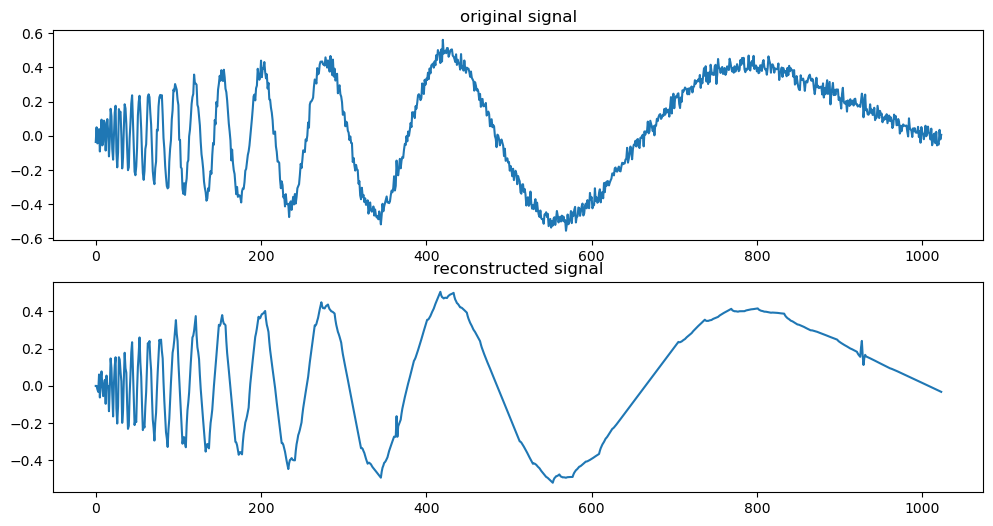

In [59]:
denoise(signalNoisy)

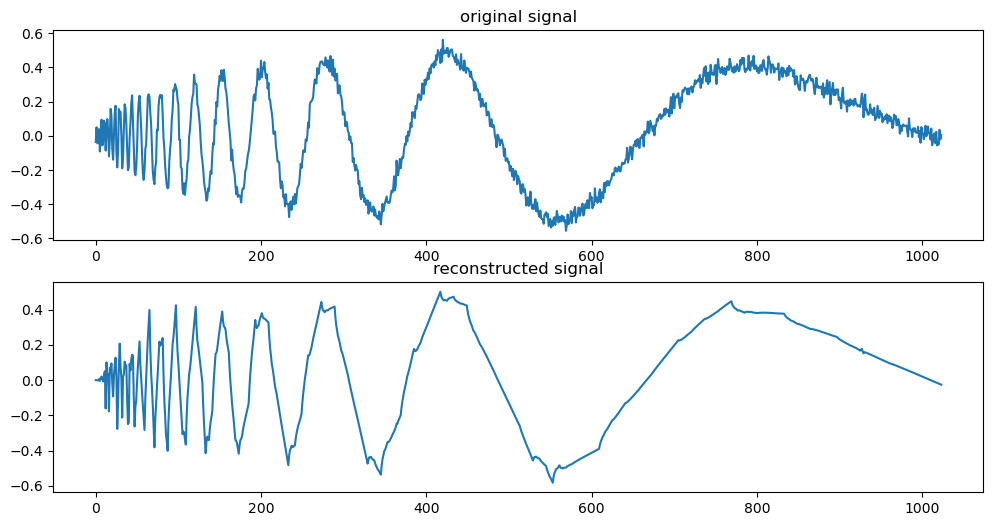

In [60]:
denoise(signalNoisy, 'soft')

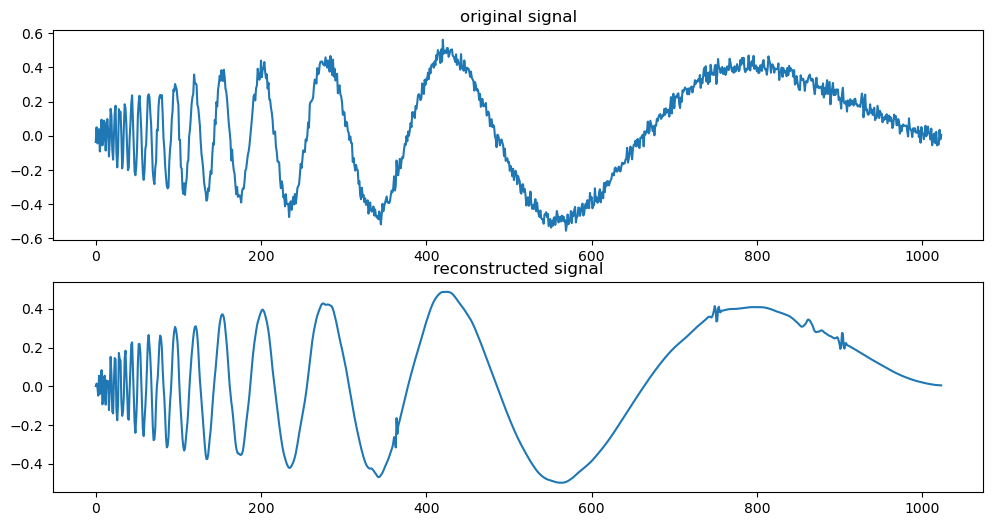

In [61]:
denoise(signalNoisy, 'hard', 'db4')

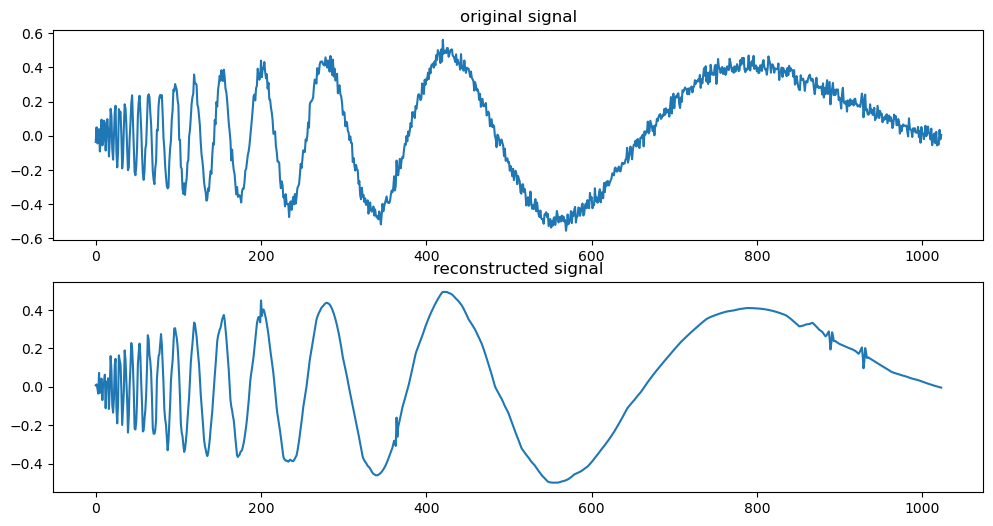

In [62]:
denoise(signalNoisy, 'hard', 'db3')

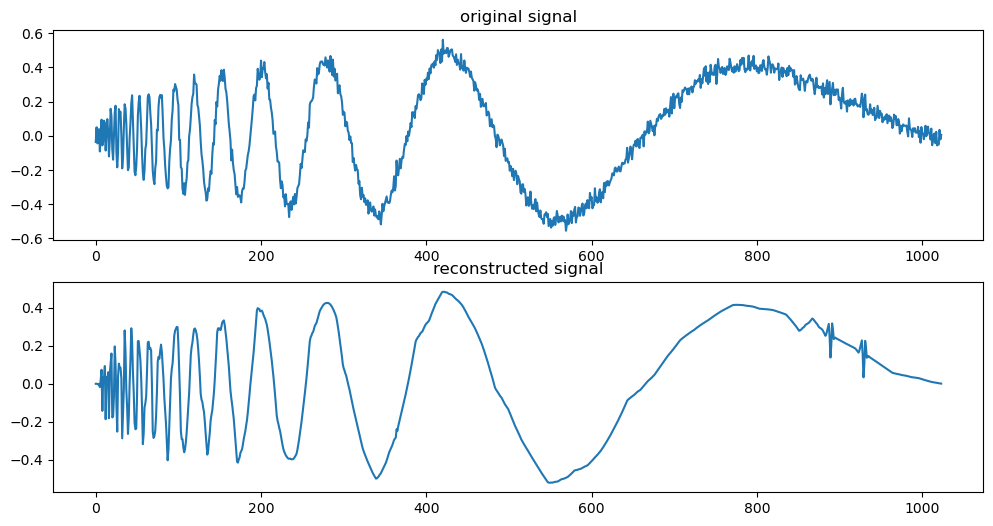

In [63]:
denoise(signalNoisy, 'soft', 'db3')

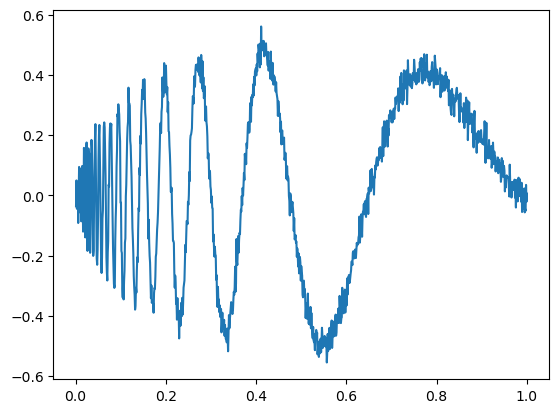

In [58]:
n = 1024
t = np.arange(1, n + 1)/n
signal = pywt.data.demo_signal('Doppler', n)        # try also with 'Doppler'
sigma = 0.03                                                # sigma = 0.03 for 'Doppler'            
signalNoisy = signal + sigma * random.standard_normal(n)
plt.plot(t, signalNoisy)
plt.show()

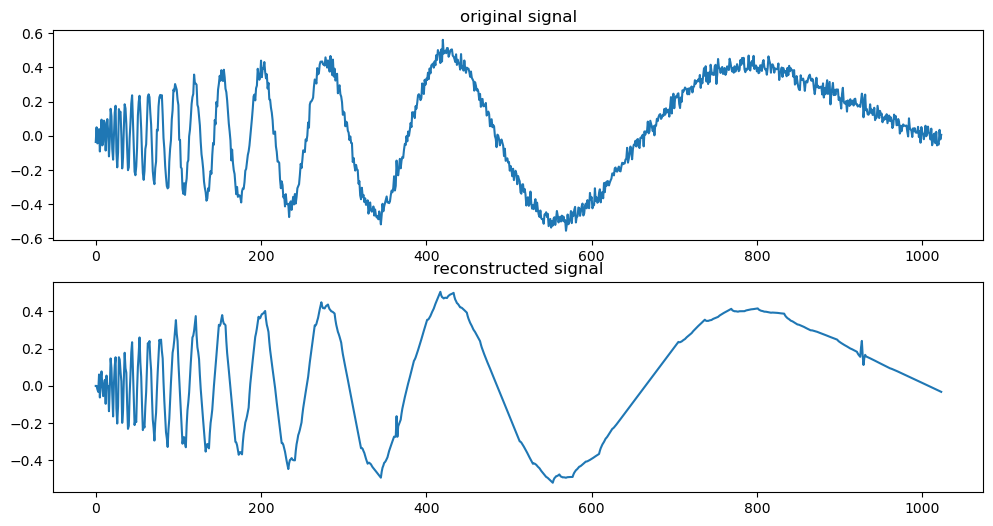

In [59]:
denoise(signalNoisy)

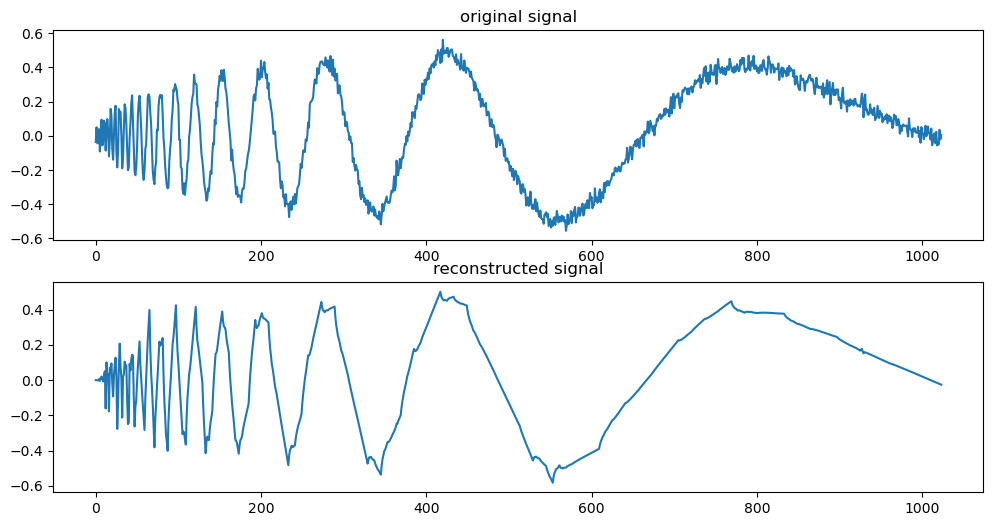

In [60]:
denoise(signalNoisy, 'soft')

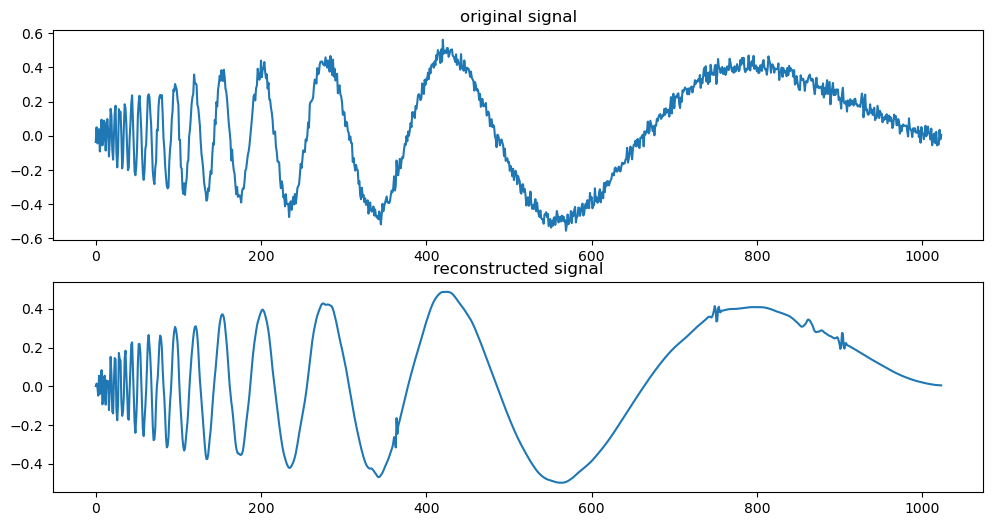

In [61]:
denoise(signalNoisy, 'hard', 'db4')

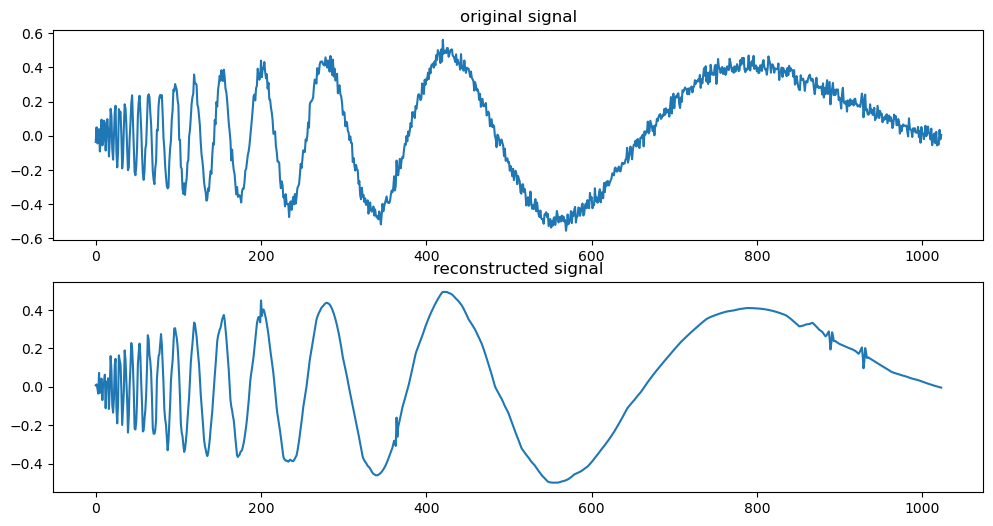

In [62]:
denoise(signalNoisy, 'hard', 'db3')

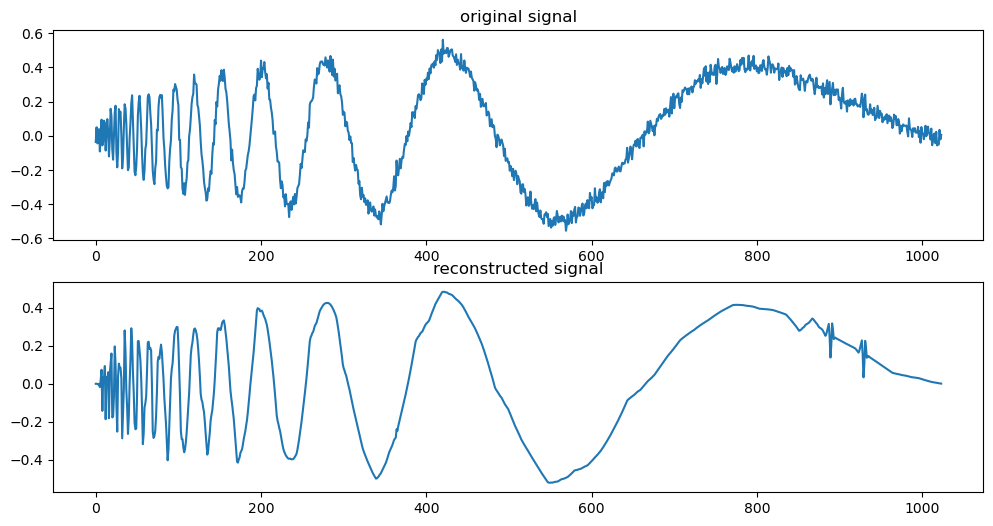

In [63]:
denoise(signalNoisy, 'soft', 'db3')

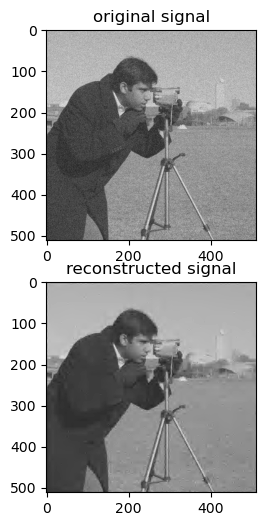

In [64]:
denoise(imageNoisy)

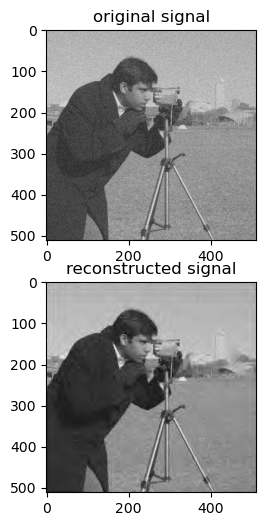

In [65]:
denoise(imageNoisy, 'hard', 'db4')

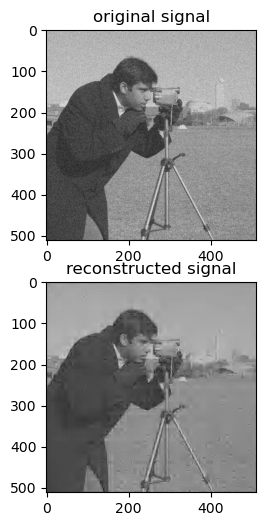

In [66]:
denoise(imageNoisy, 'soft')